In [1]:
from main import main
import globals as gl

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

Base directory found: /Users/mnlmrc/Documents/data/SensoriMotorPrediction/
Base directory: /Users/mnlmrc/Documents/data/SensoriMotorPrediction/


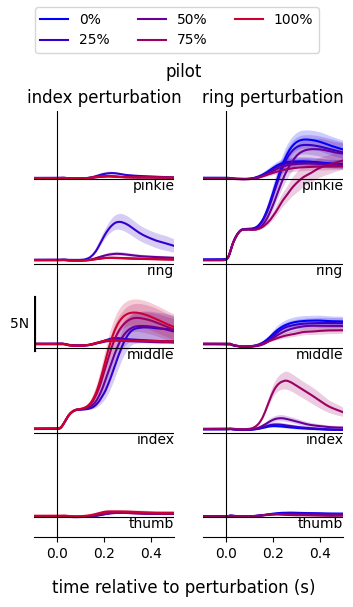

In [2]:
experiment = 'smp2'
session = 'pilot'
participant_id = gl.participants[experiment]
main('PLOT:timec_force', experiment, session, participant_id, 
     varargin={'GoNogo': 'go',
               'title': session,
                'vsep': 8,
              'ref_len': 5})

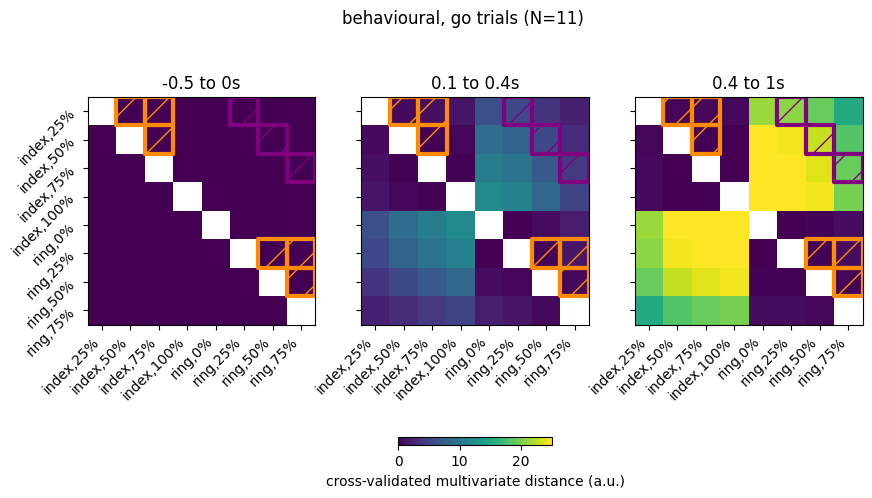

(<Figure size 1000x500 with 4 Axes>,
 array([<Axes: title={'center': '-0.5 to 0s'}>,
        <Axes: title={'center': '0.1 to 0.4s'}>,
        <Axes: title={'center': '0.4 to 1s'}>], dtype=object))

In [3]:
experiment = 'smp0'
session = 'behavioural'
participant_id = gl.participants[experiment]
main('PLOT:rdm_force', experiment, session, participant_id, varargin={'GoNogo': 'go',
                                                        'timew': [(-.5, 0), (.1, .4), (.4, 1)],
                                                        'vmin': 0,
                                                        'vmax': 25})

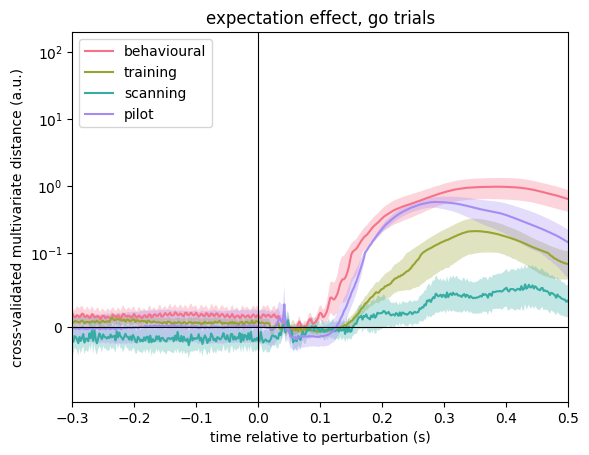

In [4]:
experiment = 'smp2'
session = 'pilot'
participant_id = gl.participants[experiment]
main('PLOT:timec_dist_force_session', varargin={'GoNogo': 'go'})